In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import datetime

In [4]:
df = pd.read_csv("Border_Crossing_Entry_Data.csv")
df

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)
...,...,...,...,...,...,...,...,...
346728,Norton,Vermont,211,US-Canada Border,01/01/1996 12:00:00 AM,Personal Vehicle Passengers,9119,POINT (-71.79 45.01)
346729,Columbus,New Mexico,2406,US-Mexico Border,01/01/1996 12:00:00 AM,Personal Vehicles,29486,POINT (-107.63 31.78)
346730,Hansboro,North Dakota,3415,US-Canada Border,01/01/1996 12:00:00 AM,Rail Containers Full,0,POINT (-99.35 49)
346731,Calexico East,California,2507,US-Mexico Border,01/01/1996 12:00:00 AM,Buses,0,POINT (-115.39 32.67)


In [5]:
df.shape

(346733, 8)

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Port Name', 'State', 'Port Code', 'Border', 'Date', 'Measure', 'Value',
       'Location'],
      dtype='object')

In [8]:
df.isnull().sum()

Port Name    0
State        0
Port Code    0
Border       0
Date         0
Measure      0
Value        0
Location     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346733 entries, 0 to 346732
Data columns (total 8 columns):
Port Name    346733 non-null object
State        346733 non-null object
Port Code    346733 non-null int64
Border       346733 non-null object
Date         346733 non-null object
Measure      346733 non-null object
Value        346733 non-null int64
Location     346733 non-null object
dtypes: int64(2), object(6)
memory usage: 21.2+ MB


In [10]:
df.describe()

,Port Code,Value
count,346733.000000,3.467330e+05
mean,2455.504910,2.818767e+04
std,1201.208459,1.518588e+05
min,101.000000,0.000000e+00
25%,2304.000000,0.000000e+00
50%,3013.000000,9.000000e+01
75%,3402.000000,2.483000e+03
max,4105.000000,4.447374e+06


In [11]:
print('Attribute '+ 'Values')
for i in df.columns:
    print( i,len(df.loc[:,i].unique()) )

Attribute Values
Port Name 116
State 15
Port Code 117
Border 2
Date 279
Measure 12
Value 53305
Location 224


In [12]:
temp = df[['Port Name','Port Code']].drop_duplicates()
temp[temp['Port Name'].duplicated(keep=False)]

,Port Name,Port Code
29,Eastport,3302
217,Eastport,103


In [13]:
df.iloc[[29,217]]

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
29,Eastport,Idaho,3302,US-Canada Border,03/01/2019 12:00:00 AM,Trains,101,POINT (-116.18027999999998 48.99944)
217,Eastport,Maine,103,US-Canada Border,03/01/2019 12:00:00 AM,Trucks,165,POINT (-66.99387 44.90357)


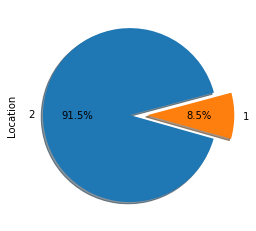

In [14]:
indexes = df['Location'].drop_duplicates().index
temp = df.iloc[indexes].groupby(by='Port Code')['Location'].count()
temp.value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0,0.20],startangle=15)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].apply(lambda x : x.year)

month_mapper = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun'
               ,7:'Jul', 8:'Aug', 9:'Sep' ,10:'Oct', 11:'Nov', 12:'Dec'}
df['Month'] = df['Date'].apply(lambda x : x.month).map(month_mapper)

del month_mapper

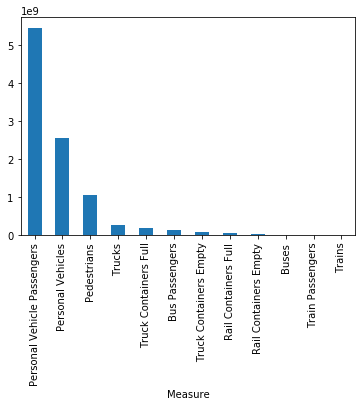

In [16]:
df.groupby(by='Measure')['Value'].sum().sort_values(ascending=False).plot(kind='bar')

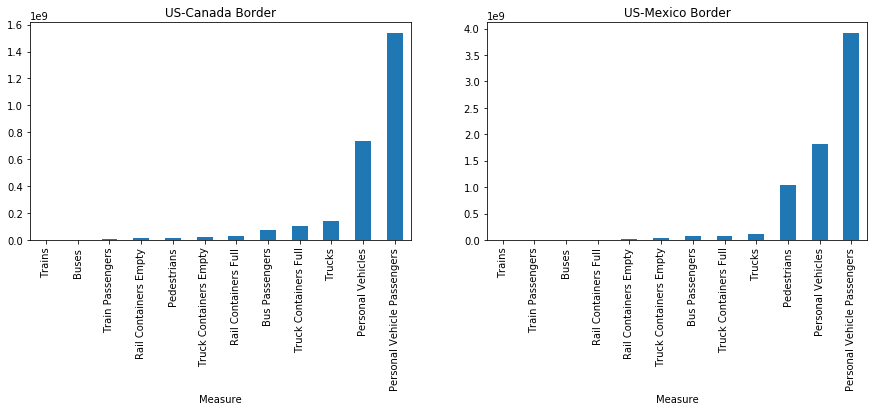

In [17]:
temp = df.groupby(by=['Border','Measure'])['Value'].sum().unstack()
temp.fillna(0,inplace=True)

plt.figure(figsize=(15,4))

plt.subplot(121)
temp.iloc[0].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('US-Canada Border')

plt.subplot(122)
temp.iloc[1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('US-Mexico Border')

del temp

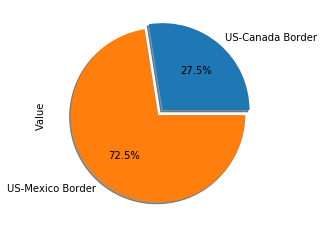

In [18]:
df.groupby(by='Border')['Value'].sum().plot(kind='pie', autopct='%1.1f%%', explode=[0.075,0], shadow=True)

Text(0.5, 1.0, 'Measure Values Through Years')

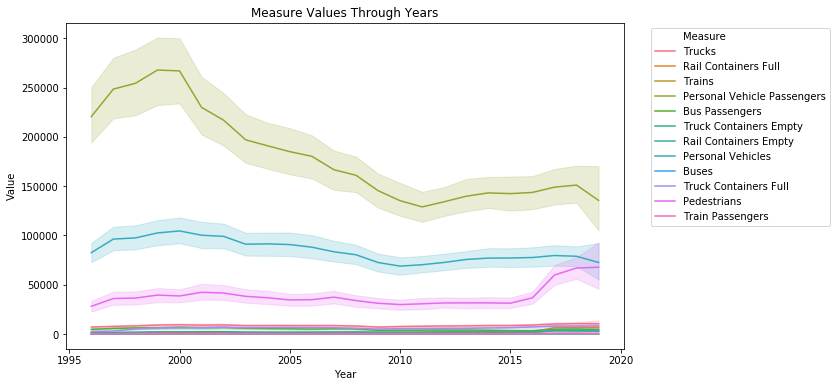

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Year', y='Value', hue='Measure',legend='full')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Measure Values Through Years')

Text(0.5, 1.0, 'Value by month')

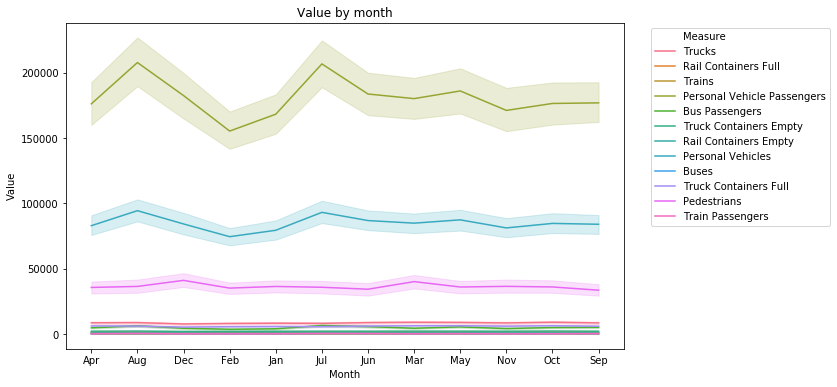

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='Value',legend='full', hue='Measure')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Value by month')

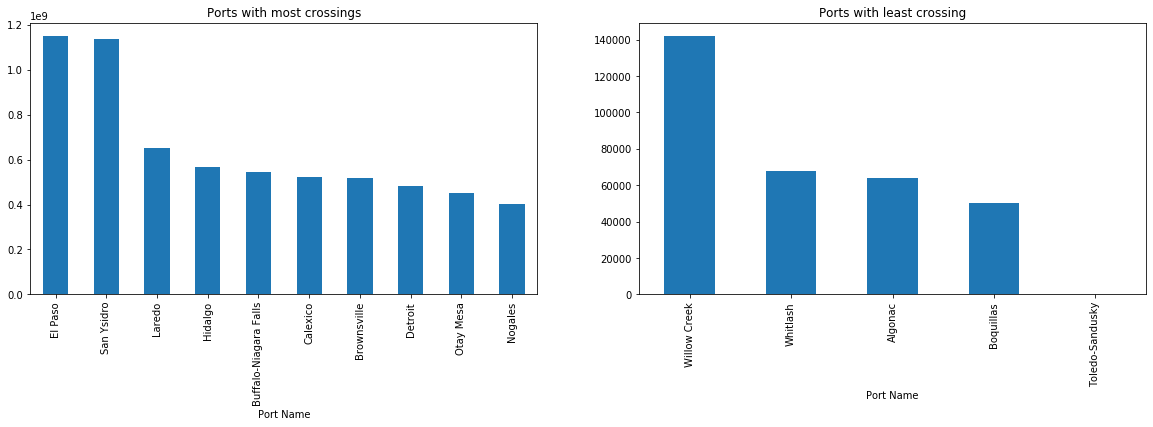

In [21]:
temp = df.groupby(by='Port Name')['Value'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,5))
plt.subplot(121)
temp.head(10).plot(kind='bar')
plt.title('Ports with most crossings')

plt.subplot(122)
temp.tail().plot(kind='bar')
plt.title('Ports with least crossing')
del temp

In [22]:
measure_size = {'Trucks' : 'Mid_Size', 'Rail Containers Full' : 'Mid_Size', 'Trains' : 'Big_Size',
       'Personal Vehicle Passengers':'Small_Size', 'Bus Passengers':'Small_Size',
       'Truck Containers Empty':'Mid_Size', 'Rail Containers Empty':'Mid_Size',
       'Personal Vehicles' : 'Small_Size', 'Buses' : 'Mid_Size', 'Truck Containers Full' : 'Mid_Size',
       'Pedestrians':'Small_Size', 'Train Passengers':'Small_Size'}

df['Size'] = df['Measure'].map(measure_size)

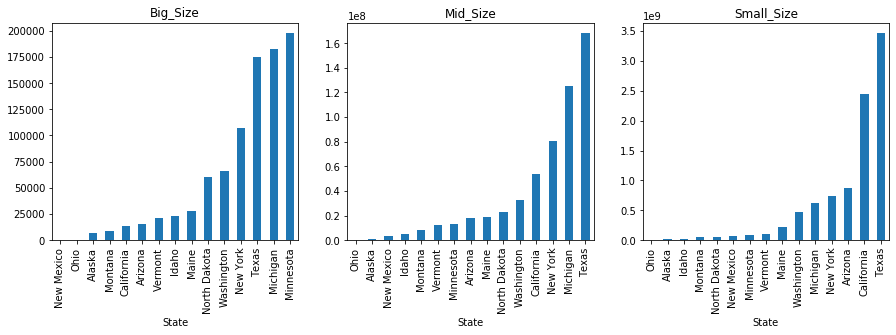

In [23]:
temp = df.groupby(by=['Size','State'])['Value'].sum().unstack()
temp.fillna(0,inplace=True)

plt.figure(figsize=(15,4))

plt.subplot(131)
temp.iloc[0].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Big_Size')

plt.subplot(132)
temp.iloc[1].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Mid_Size')

plt.subplot(133)
temp.iloc[2].sort_values().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Small_Size')

del temp

<Figure size 1080x432 with 0 Axes>

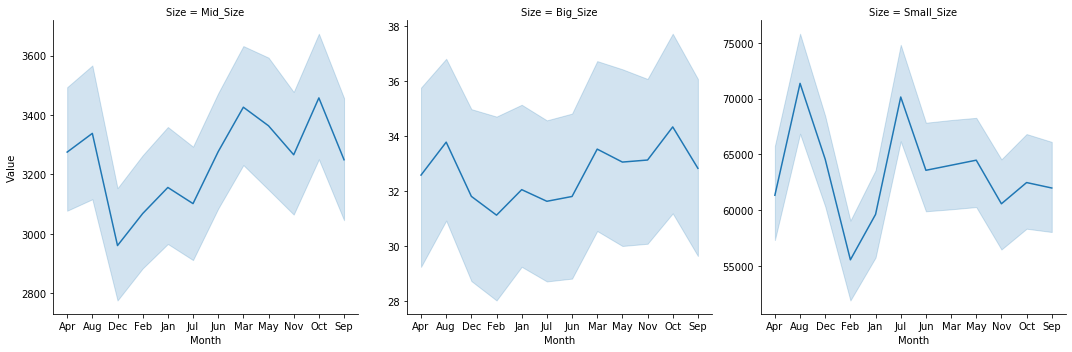

In [24]:
plt.figure(figsize=(15,6))
g = sns.FacetGrid(data=df, col='Size', sharey=False, height=5, aspect=1)
g.map(sns.lineplot, 'Month', 'Value')